![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

,year,births,deaths,clinic
,<int>,<int>,<int>,<chr>
1,1841,3036,237,clinic 1
2,1842,3287,518,clinic 1
3,1843,3060,274,clinic 1
4,1844,3157,260,clinic 1
5,1845,3492,241,clinic 1
6,1846,4010,459,clinic 1


,date,births,deaths
,<chr>,<int>,<int>
1,1841-01-01,254,37
2,1841-02-01,239,18
3,1841-03-01,277,12
4,1841-04-01,255,4
5,1841-05-01,255,2
6,1841-06-01,200,10


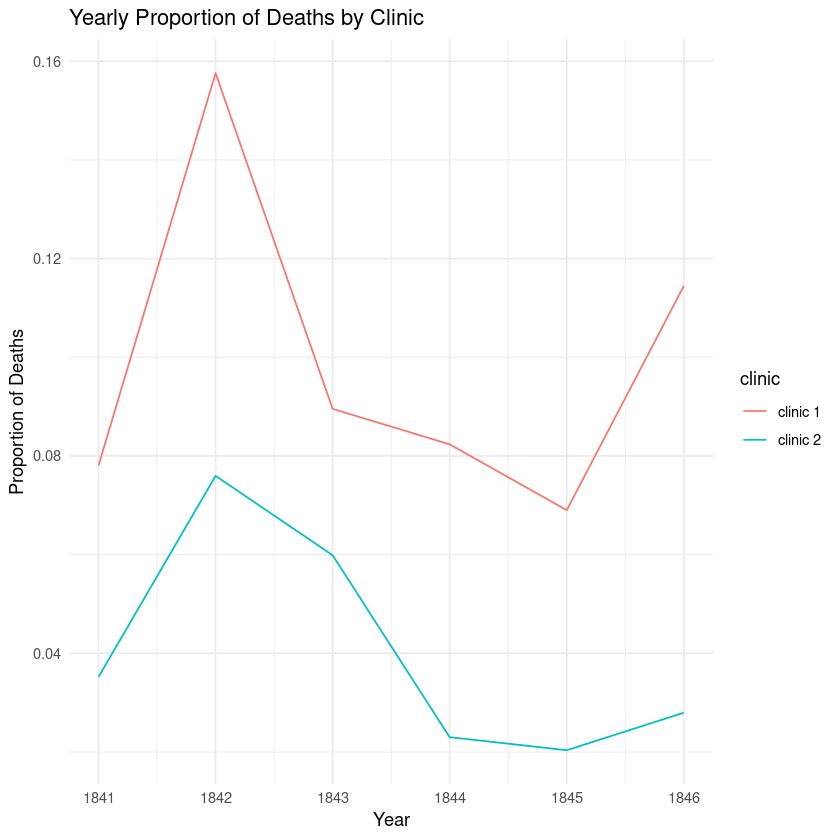

handwashing_started,mean_proportion_deaths
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338


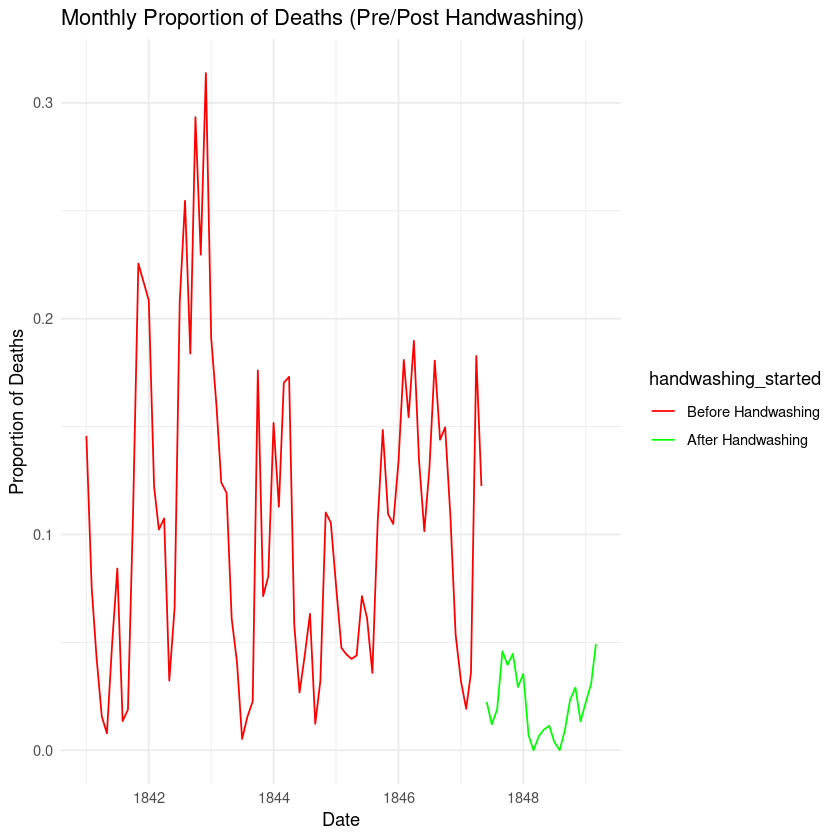

In [16]:
# Imported libraries
library(tidyverse)

# Start coding here..
# Step 1: Load the data
yearly <- read.csv("data/yearly_deaths_by_clinic.csv")
monthly <- read.csv("data/monthly_deaths.csv")

# Inspect the data
head(yearly)
head(monthly)

# Step 2: Add a 'proportion_deaths' column
yearly <- yearly %>%
  mutate(proportion_deaths = deaths / births)

monthly <- monthly %>%
  mutate(proportion_deaths = deaths / births)

# Step 3: Create ggplot line plot for yearly data with different colors for each clinic
ggplot(yearly, aes(x = year, y = proportion_deaths, color = clinic)) +
  geom_line() +
  labs(title = "Yearly Proportion of Deaths by Clinic", x = "Year", y = "Proportion of Deaths") +
  theme_minimal()

# Step 4: Add 'handwashing_started' column to the monthly data
monthly <- monthly %>%
  mutate(handwashing_started = as.Date(date) >= as.Date("1847-06-01"))

# Step 5: Create ggplot line plot for monthly data, with different colors depending on 'handwashing_started'
ggplot(monthly, aes(x = as.Date(date), y = proportion_deaths, color = handwashing_started)) +
  geom_line() +
  labs(title = "Monthly Proportion of Deaths (Pre/Post Handwashing)", x = "Date", y = "Proportion of Deaths") +
  scale_color_manual(values = c("red", "green"), labels = c("Before Handwashing", "After Handwashing")) +
  theme_minimal()

# Step 6: Calculate the mean proportion of deaths before and after handwashing
monthly_summary <- monthly %>%
  group_by(handwashing_started) %>%
  summarize(mean_proportion_deaths = mean(proportion_deaths, na.rm = TRUE))

# Show the summary table
monthly_summary

In [17]:
# Assuming you're trying to filter by the 'date' column and a certain condition.
monthly_filtered <- dplyr::filter(monthly, as.Date(date) >= as.Date("1847-06-01"))

# Or if you're trying to filter by the 'proportion_deaths' column
monthly_filtered <- dplyr::filter(monthly, proportion_deaths > 0.1)  # Example condition

In [18]:
# Inspect the column names in the 'monthly' data frame
colnames(monthly)

[1] "date"                "births"              "deaths"             
[4] "proportion_deaths"   "handwashing_started"

In [19]:
# Filter the monthly data by date and handwashing_started status
monthly_filtered <- dplyr::filter(monthly, as.Date(date) >= as.Date("1847-06-01"))

# Before handwashing
monthly_before_handwashing <- dplyr::filter(monthly, as.Date(date) < as.Date("1847-06-01"))

# Checking the filtered data (for example, to view the first few rows of the before handwashing data)
head(monthly_before_handwashing)

,date,births,deaths,proportion_deaths,handwashing_started
,<chr>,<int>,<int>,<dbl>,<lgl>
1,1841-01-01,254,37,0.145669291,FALSE
2,1841-02-01,239,18,0.075313808,FALSE
3,1841-03-01,277,12,0.043321300,FALSE
4,1841-04-01,255,4,0.015686275,FALSE
5,1841-05-01,255,2,0.007843137,FALSE
6,1841-06-01,200,10,0.050000000,FALSE


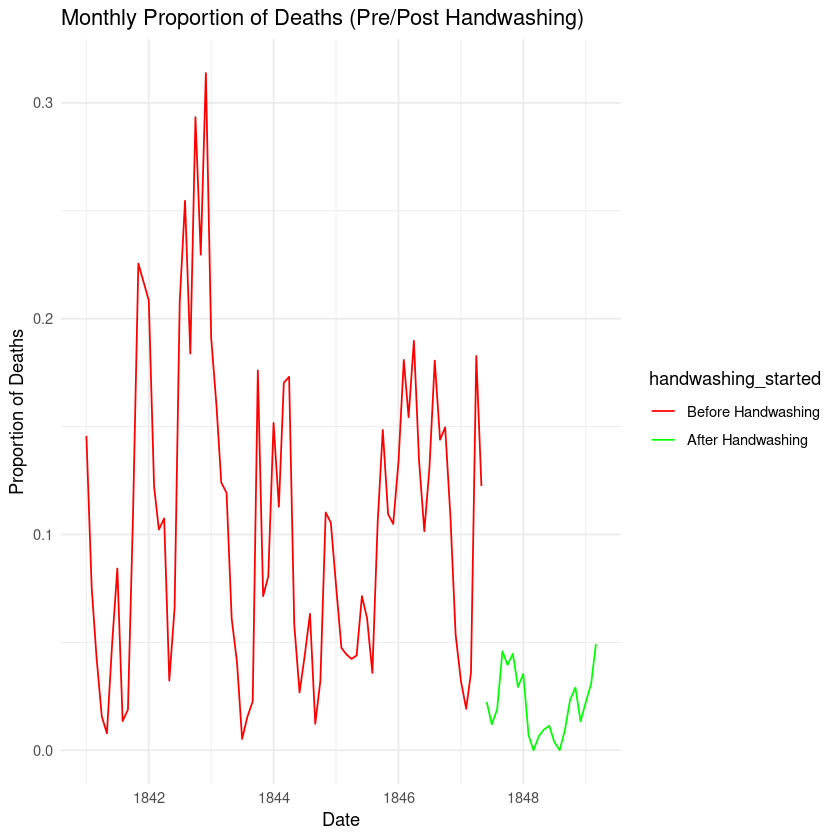

In [20]:
# Create a plot to show the effect of handwashing on the proportion of deaths
ggplot(monthly, aes(x = as.Date(date), y = proportion_deaths, color = handwashing_started)) +
  geom_line() +
  labs(title = "Monthly Proportion of Deaths (Pre/Post Handwashing)", 
       x = "Date", 
       y = "Proportion of Deaths") +
  scale_color_manual(values = c("red", "green"), labels = c("Before Handwashing", "After Handwashing")) +
  theme_minimal()

In [21]:
# Calculate the mean proportion of deaths before and after handwashing
monthly_summary <- monthly %>%
  group_by(handwashing_started) %>%
  summarize(mean_proportion_deaths = mean(proportion_deaths, na.rm = TRUE))

# View the summary results
monthly_summary

handwashing_started,mean_proportion_deaths
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338
